# Energy Consumption Forecasting

## Step 1:

### Import Necessary Libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pprint
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


%matplotlib inline

### Loading the target Dataset and analyze

In [87]:
df = pd.read_csv("AEP_hourly.csv") # AEP_hourly.csv is a standard dataset available in kaggle platform which contains about 121273 datasets
print("="*50)
print("\033[1mFirst Five Rows\033[0m","\n")
print(df.head(2),"\n")

print("="*50)
print("\033[1mInformation About Dataset\033[0m","\n")
print(df.info(),"\n")

print("="*50)
print("\033[1mDescribe the Dataset\033[0m","\n")
print(df.describe(),"\n")

print("="*50)
print("\033[1mNull Values in our dataset\033[0m","\n")
print(df.isnull().sum(),"\n")

First Five Rows 

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset 

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

Null Values in our dataset 

Datetime    0
AEP_MW      0
dtype: int64 



# Step 2:
## Reformating the Date Time Columns 

In [89]:
# Extract all Data Like Year MOnth Day Time etc
dataset = df
# dataset = df.copy()
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

,AEP_MW,Month,Year,Date,Time,Day
Datetime,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,Friday


# Step 3:

### Let's analyze the energy consumption Each Year

In [90]:
# How many Unique Year do we Have in Dataset 
print(df.Year.unique(),"\n")
print("Total Number of Unique Year:", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year: 15 



Text(0.5, 1.0, 'Energy Consumption According to Year')

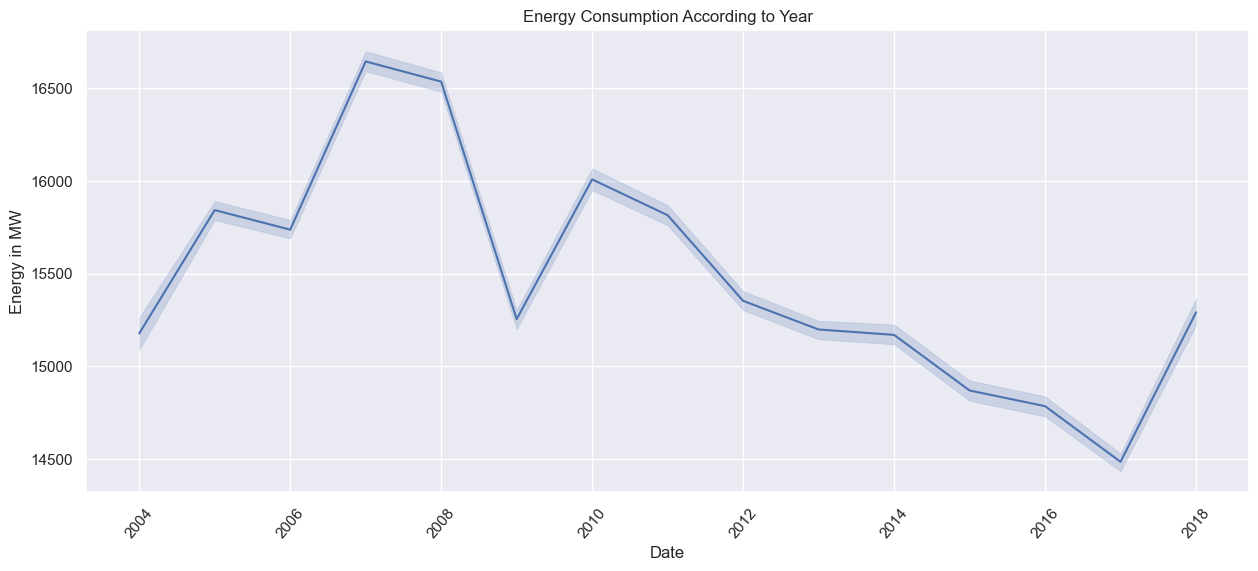

In [92]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(50)


plt.title("Energy Consumption According to Year")

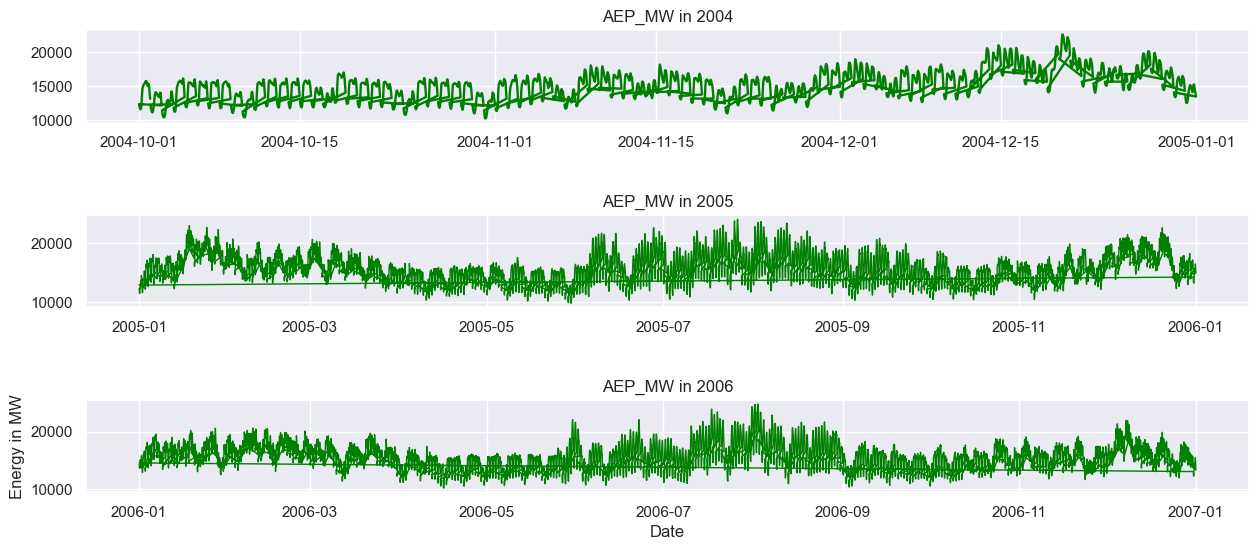

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

# Extracting specific year data
data_2004 = df.loc['2004']
data_2005 = df.loc['2005']
data_2006 = df.loc['2006']

y_2004 = data_2004["AEP_MW"].to_list()
x_2004 = data_2004.index.to_list()

y_2005 = data_2005["AEP_MW"].to_list()
x_2005 = data_2005.index.to_list()

y_2006 = data_2006["AEP_MW"].to_list()
x_2006 = data_2006.index.to_list()

fig = plt.figure()

ax1 = fig.add_subplot(311)
ax1.plot(x_2004, y_2004, color="green", linewidth=1.7)
ax1.set_title('AEP_MW in 2004')

ax2=fig.add_subplot(312)
ax2.plot(x_2005, y_2005,color="green",linewidth=1)
ax2.set_title("AEP_MW in 2005")

ax3=fig.add_subplot(313)
ax3.plot(x_2006,y_2006,color="green",linewidth=1)
ax3.set_title("AEP_MW in 2006")

plt.xlabel("Date")
plt.ylabel("Energy in MW")

plt.subplots_adjust(hspace=1)
plt.show()


### Energy Distribution

Text(0.5, 1.0, 'Ennergy Distribution')

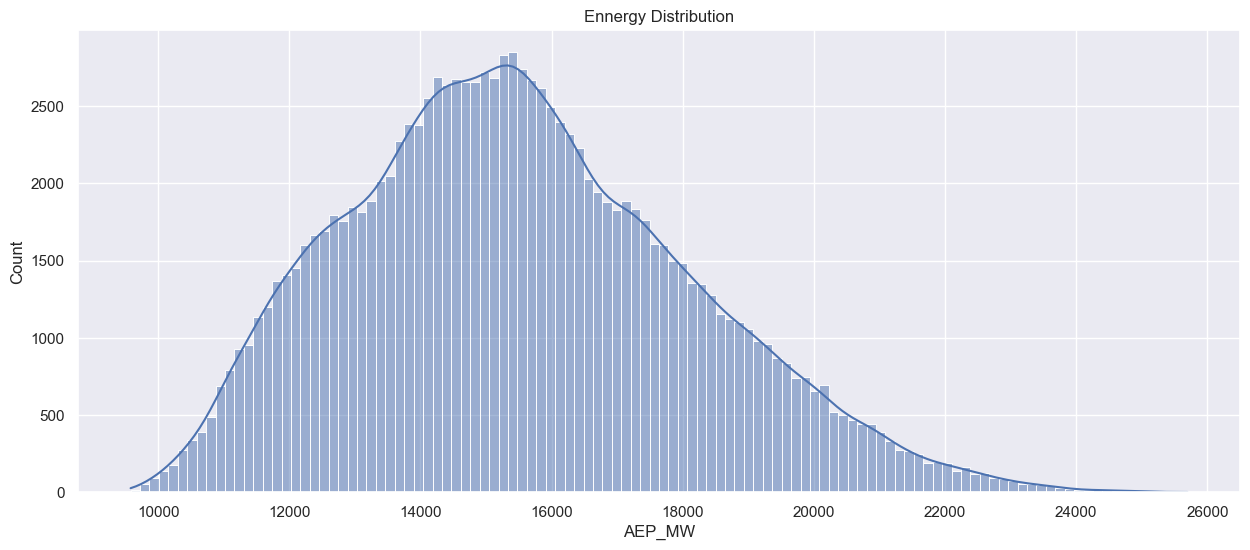

In [94]:
sns.histplot(dataset["AEP_MW"], kde=True)
plt.title("Ennergy Distribution")

In [95]:
print(df.columns)

Index(['AEP_MW', 'Month', 'Year', 'Date', 'Time', 'Day'], dtype='object')


In [96]:
print(df.dtypes)

AEP_MW    float64
Month       int32
Year        int32
Date       object
Time       object
Day        object
dtype: object


# Energy with Respect to Month

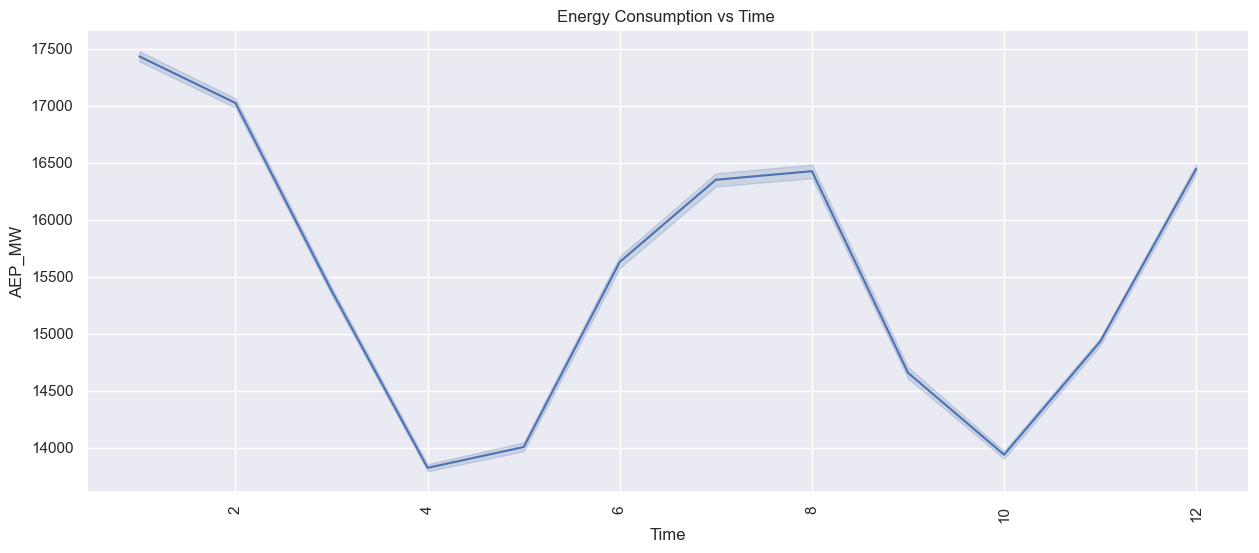

In [98]:

fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=dataset["Month"],y=dataset["AEP_MW"], data=df)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

# Resampleing Data 

In [101]:
if 'Datetime' in df.columns:
    df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')
    df.set_index('Datetime', inplace=True)

    # Only include numeric columns for resampling
    numeric_df = df.select_dtypes(include=['number'])

    # Resample and calculate mean
    NewDataSet = numeric_df.resample('D').mean()

    print(NewDataSet.head())
else:
    print("Column 'Datetime' not found in DataFrame.")

Column 'Datetime' not found in DataFrame.


In [103]:

print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (121273, 6)
New  Dataset  (5055, 3)


In [104]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (121273, 6)
New  Dataset  (5055, 3)


In [111]:
TestData = NewDataSet.tail(100)  #create a test dataset from the last 100 rows of NewDataSet.

Training_Set = NewDataSet.iloc[:,0:1]  #create a training set from the first column of NewDataSet.

Training_Set = Training_Set[:-60]  #remove the last 60 rows from Training_Set.


In [112]:
print("Test Set Shape ", TestData.shape)
print("Training Set Shape ", Training_Set.shape)

Test Set Shape  (100, 3)
Training Set Shape  (4995, 1)


In [113]:
Training_Set = Training_Set.values  #convert the DataFrame Training_Set into a NumPy array.
sc = MinMaxScaler(feature_range=(0, 1))  #create an instance of the MinMaxScaler from the sklearn.preprocessing module.
Train = sc.fit_transform(Training_Set)  #scale the data in Training_Set to the range [0, 1] using the MinMaxScaler.

In [115]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [116]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

# Model

In [117]:

regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [118]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)  #trains the model using the provided training data,The training process will run for 50 epochs, with a batch size of 32.
#also in the below output 155 is called "steps per epoch" and it is calculated as total number of training samples(4935)/batch size(32)

Epoch 1/50
155/155 [==============================] - 20s 86ms/step - loss: 0.0232
Epoch 2/50
155/155 [==============================] - 13s 86ms/step - loss: 0.0186
Epoch 3/50
155/155 [==============================] - 13s 86ms/step - loss: 0.0174
Epoch 4/50
155/155 [==============================] - 13s 85ms/step - loss: 0.0164
Epoch 5/50
155/155 [==============================] - 13s 85ms/step - loss: 0.0160
Epoch 6/50
155/155 [==============================] - 13s 85ms/step - loss: 0.0157
Epoch 7/50
155/155 [==============================] - 13s 85ms/step - loss: 0.0150
Epoch 8/50
155/155 [==============================] - 14s 88ms/step - loss: 0.0143
Epoch 9/50
155/155 [==============================] - 13s 86ms/step - loss: 0.0121
Epoch 10/50
155/155 [==============================] - 13s 86ms/step - loss: 0.0104
Epoch 11/50
155/155 [==============================] - 13s 85ms/step - loss: 0.0096
Epoch 12/50
155/155 [==============================] - 13s 86ms/step - loss: 0.0086
E

# Test Data

In [119]:
TestData.head(2)

,AEP_MW,Month,Year
Datetime,,,
2018-04-26,13157.791667,4.0,2018.0
2018-04-27,12964.000000,4.0,2018.0


In [120]:
TestData.shape

(100, 3)

In [121]:
NewDataSet.shape

(5055, 3)

In [122]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

In [123]:
Df_Total.shape

(5155, 1)

In [124]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [125]:

inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

4/4 [==============================] - 1s 27ms/step


In [126]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

In [127]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

# Predicting Energy Consumption in Future Days

In [128]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-04-26,13157.791667,13524.905273
1,2018-04-27,12964.000000,13029.667969
2,2018-04-28,12237.583333,14549.647461
3,2018-04-29,12156.791667,13309.161133
4,2018-04-30,13443.500000,13120.440430
...,...,...,...
95,2018-07-30,15368.083333,15168.966797
96,2018-07-31,15180.291667,15573.475586
97,2018-08-01,15151.166667,15102.851562
98,2018-08-02,15687.666667,15375.739258


In [129]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

Text(0.5, 1.0, 'Machine Learned the Pattern Predicting Future Values ')

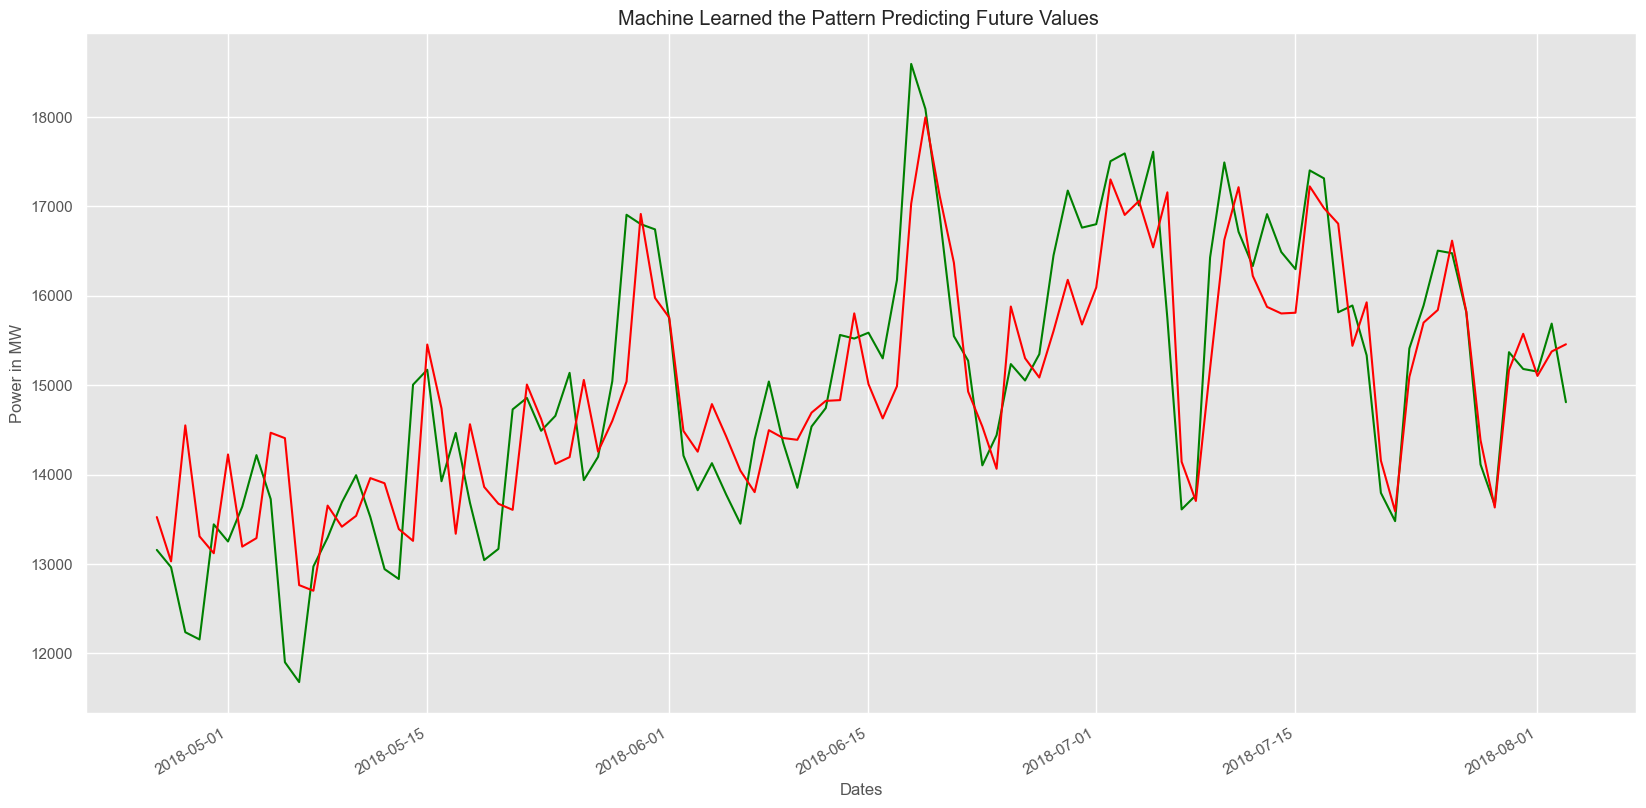

In [144]:

fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")  #green plot indicates the actual values and red plot indicates the predicted values

# Clustering 

In [145]:
print(dataset.shape)
print(dataset.head(2))

(121273, 7)
                      AEP_MW  Month  Year        Date                Time  \
Datetime                                                                    
2004-12-31 01:00:00  13478.0     12  2004  2004-12-31 1900-01-01 01:00:00   
2004-12-31 02:00:00  12865.0     12  2004  2004-12-31 1900-01-01 02:00:00   

                        Day  Cluster  
Datetime                              
2004-12-31 01:00:00  Friday        1  
2004-12-31 02:00:00  Friday        1  


Text(0.5, 1.0, 'time vs energy ')

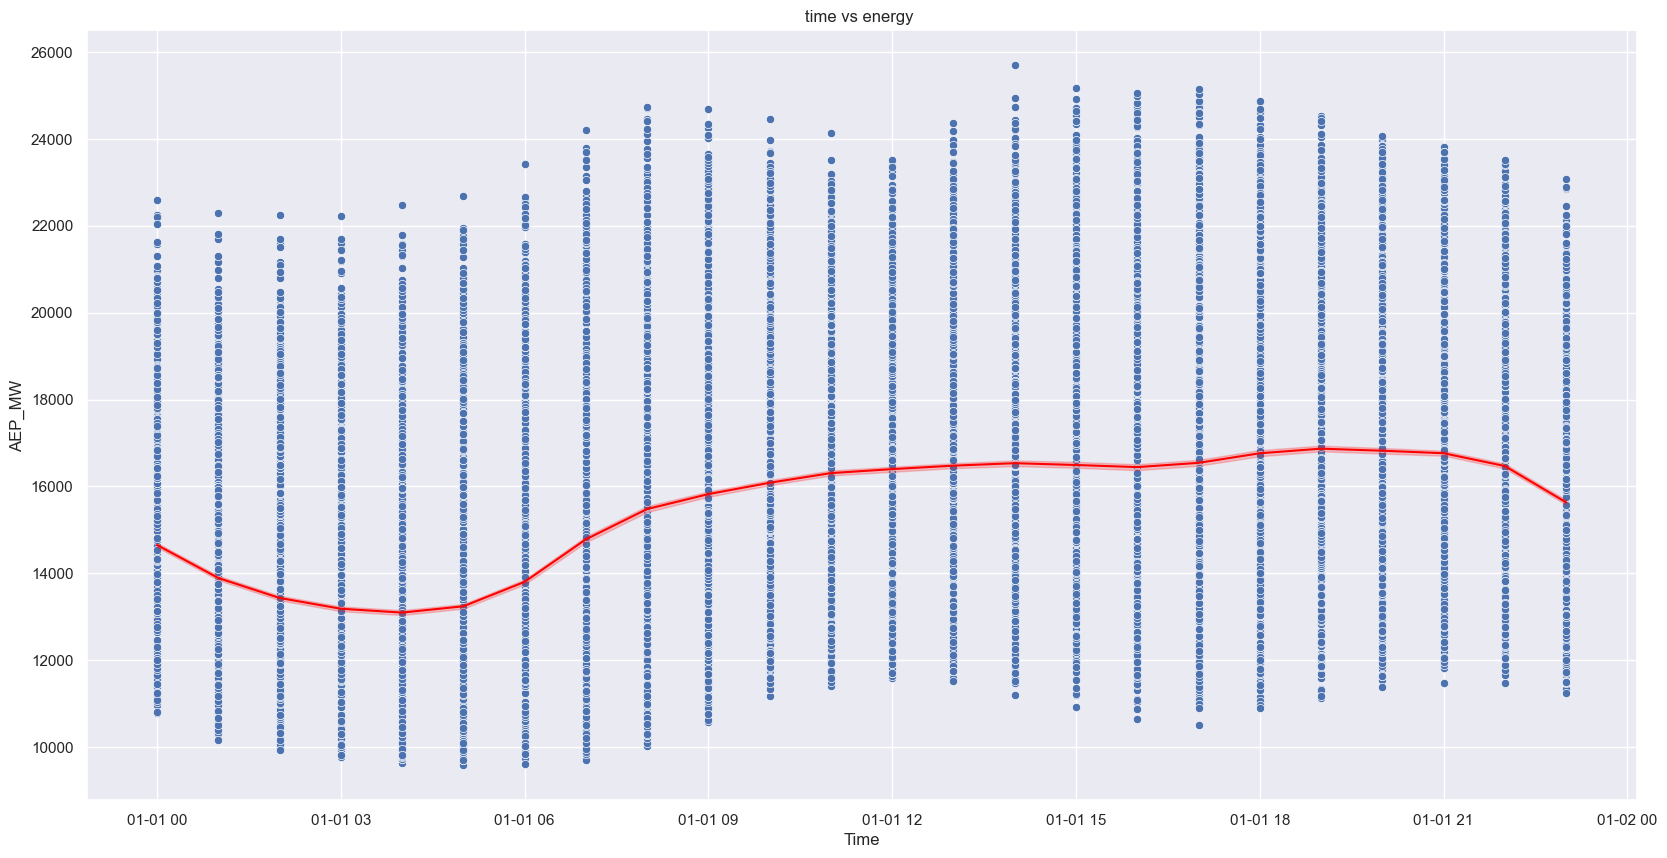

In [147]:
dataset['Time'] = pd.to_datetime(dataset['Time'], format='%H:%M:%S')
y = dataset["AEP_MW"]
x = dataset["Time"]

sns.scatterplot(x=x,y=y, data=dataset)
sns.lineplot(x=x,y=y,data=dataset, color="red")
sns.set(rc={'figure.figsize':(20,10)})
plt.title("time vs energy ")

In [148]:
print(y.values.shape)
print(y.values.reshape(-1,1))

(121273,)
[[13478.]
 [12865.]
 [12577.]
 ...
 [20820.]
 [20415.]
 [19993.]]


In [149]:
y = dataset["AEP_MW"]
x = dataset["Time"]
kmeans = KMeans(n_clusters=3, n_init=10)  # or you can set n_init='auto'
y = y.values.reshape(-1,1)
# Fit the model
kmeans.fit(y)

KMeans(n_clusters=3, n_init=10)

In [150]:
dataset["Cluster"] = kmeans.labels_

In [151]:
dataset.head(2)

,AEP_MW,Month,Year,Date,Time,Day,Cluster
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,1900-01-01 01:00:00,Friday,1
2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,1900-01-01 02:00:00,Friday,1


<Axes: xlabel='AEP_MW', ylabel='Time'>

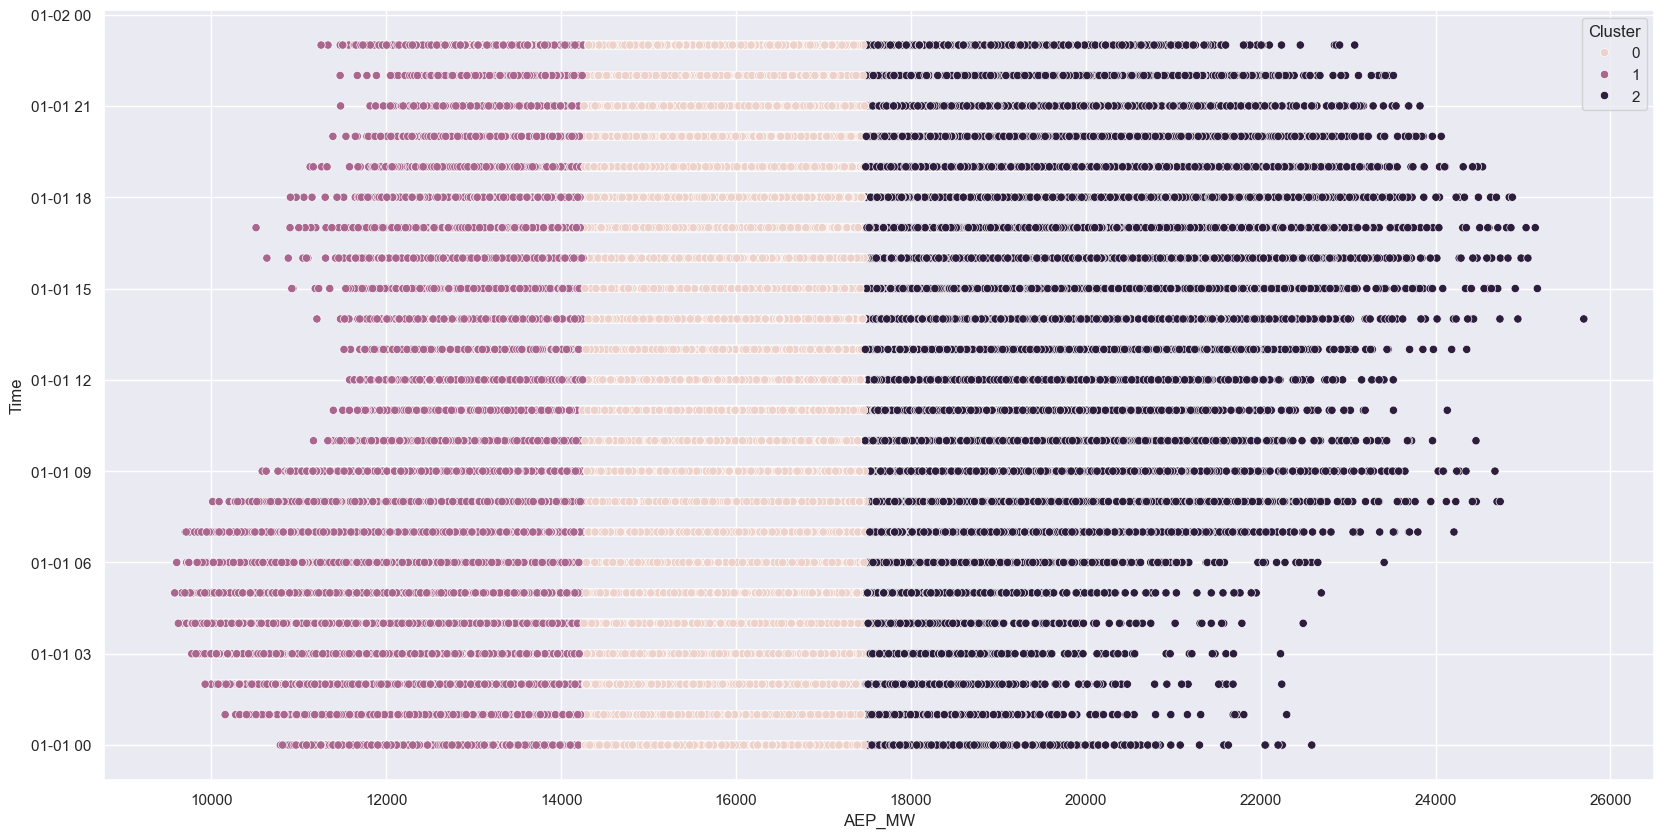

In [152]:
power = dataset["AEP_MW"]
time = dataset["Time"]

sns.scatterplot(x=power, y=time, data=dataset, hue="Cluster")

<Axes: xlabel='Day', ylabel='AEP_MW'>

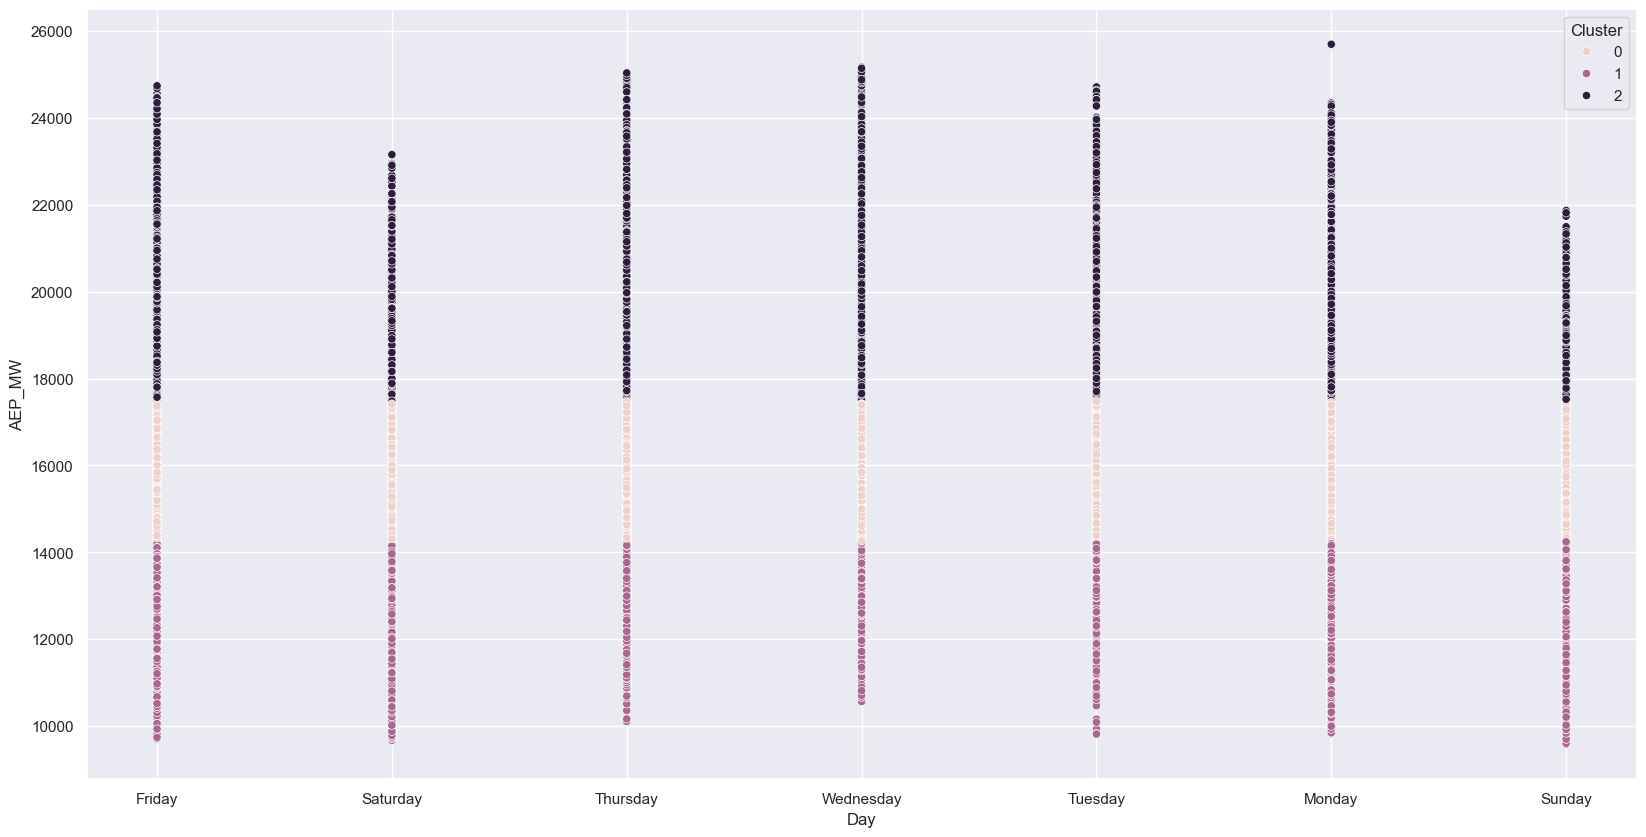

In [153]:
power = dataset["AEP_MW"]
year = dataset["Day"]

sns.scatterplot(x=year, y=power, data=dataset, hue="Cluster")

In [154]:
x = dataset[dataset["Cluster"] == 0]["AEP_MW"][0:3000].values
y = dataset[dataset["Cluster"] == 1]["AEP_MW"][0:3000].values
z = dataset[dataset["Cluster"] == 2]["AEP_MW"][0:3000].values
cluster = dataset["Cluster"][0:3000].values

print(x.shape)
print(y.shape)
print(z.shape)
print(cluster.shape)

(3000,)
(3000,)
(3000,)
(3000,)


In [155]:
style.use('ggplot')

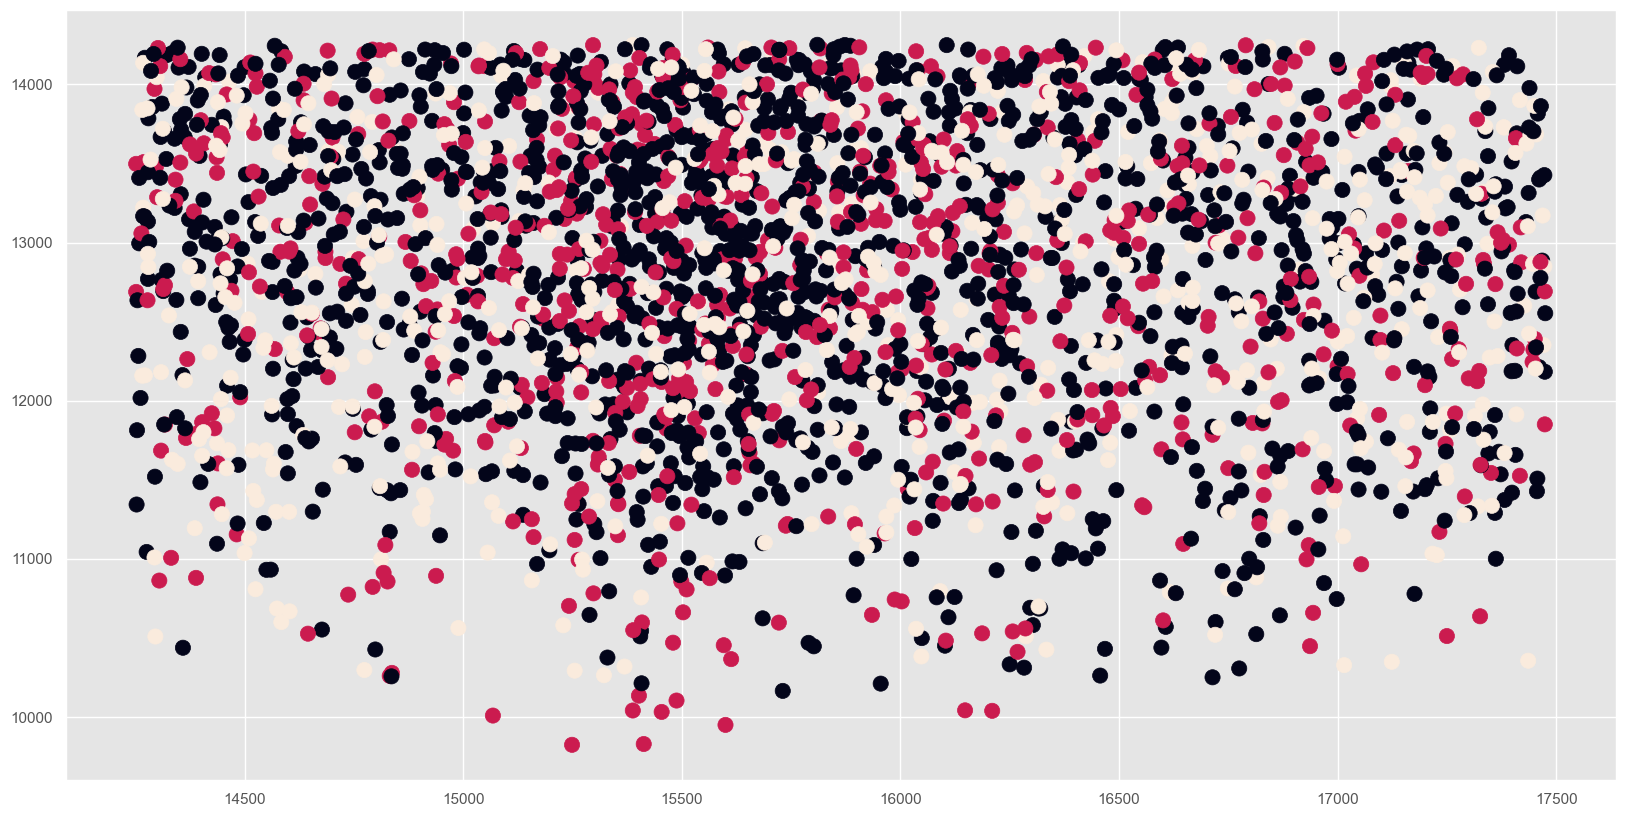

In [156]:
plt.scatter(x,y, s=120,  c =cluster)

Text(0.5, 0.92, 'Cluster 1 and Cluster 2')

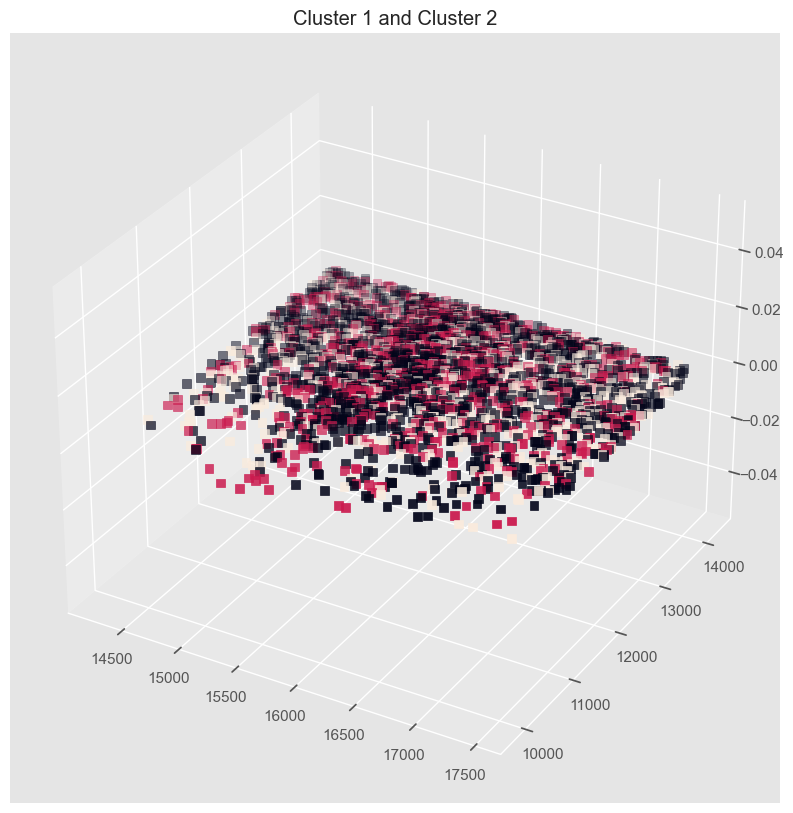

In [157]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,
           y,
           zs=0,
           marker="s", 
           s=40, 
           c = cluster.astype(float),
           depthshade=True,
           label='Cluster 1 and 2')
plt.title("Cluster 1 and Cluster 2")

